<img src="https://github.com/gantian127/pymt_roms/blob/master/docs/_static/logo.png?raw=true" width='600' align='center'></a>

## Basic Info
This Jupyter Notebook was created by Tian Gan. You can run this Jupyter Notebook through [HydroShare](https://www.hydroshare.org/resource/5bed8401cfe04c38b0f84119b1999482/).

If you have any suggestion to improve the current functions of the pymt_roms package, please create a github issue [here](https://github.com/gantian127/pymt_roms).

Suggested citation: Gan, T. (2023). Jupyter Notebooks for the ROMS Data Component, HydroShare, https://www.hydroshare.org/resource/5bed8401cfe04c38b0f84119b1999482/ 

## Introduction

[pymt_roms](https://github.com/gantian127/pymt_roms) is a package that uses the [bmi_roms](https://github.com/gantian127/bmi_roms) pacakge to convert [ROMS model](https://www.myroms.org/) datasets into a reusable, plug-and-play data component for PyMT modeling framework developed by Community Surface Dynamics Modeling System ([CSDMS](https://csdms.colorado.edu/wiki/Main_Page)). This allows ROMS datasets (currently support 3 and 4 dimensional data) to be easily coupled with other datasets or models that expose a Basic Model Interface.

### Install pymt

If you run this notebook on [HydroShare](https://www.hydroshare.org/resource/5bed8401cfe04c38b0f84119b1999482/), please skip this step. Otherwise, please follow the [instructions](https://github.com/gantian127/pymt_roms/blob/master/README.rst) to create a separate environment and install pymt.

### Install pymt_roms

use pip

In [1]:
# !pip install pymt_roms

or conda

In [2]:
# !conda install -c conda-forge pymt_roms

## Coding Examples

This section provides an example to demonstrate how to use the pymt_roms package to access the ROMS dataset using OPeNDAP service for visualization.

Import Roms class and instantiate it. A configuration file (yaml file) is required to provide the parameter settings for data download. An example yaml file is provided in the same folder with this Jupyter Notebook. 

In [3]:
import matplotlib.pyplot as plt
import numpy as np

from pymt.models import Roms

# initiate a data component
data_comp = Roms()
data_comp.initialize('config_file.yaml')

If you check the contents in the config_file.yaml, you will find out that the parameter includes the OPeNDAP data url. You can also provide a file path to load the local ROMS model dataset. The example.nc file is provided in the same folder with this Jupyter Notebook.

In [4]:
!cat config_file.yaml

bmi-roms:
  #filename: example.nc
  filename: 'https://tds.marine.rutgers.edu/thredds/dodsC/roms/doppio/2017_da/avg/runs/Averages_RUN_2023-03-31T00:00:00Z?s_rho[0:1:39],lon_rho[0:1:105][0:1:241],lat_rho[0:1:105][0:1:241],ocean_time[0:1:0],time[0:1:5],zeta[0:1:5][0:1:105][0:1:241],salt[0:1:5][0:1:39][0:1:105][0:1:241]'

Use variable related methods to check the variable information of the ROMS dataset.

In [5]:
# get variable info
for var_name in data_comp.output_var_names:
    var_unit = data_comp.var_units(var_name)
    var_location = data_comp.var_location(var_name)
    var_type = data_comp.var_type(var_name)
    var_grid = data_comp.var_grid(var_name)
    var_itemsize = data_comp.var_itemsize(var_name)
    var_nbytes = data_comp.var_nbytes(var_name)

    print('variable_name: {} \nvar_unit: {} \nvar_location: {} \nvar_type: {} \nvar_grid: {} \nvar_itemsize: {}'
        '\nvar_nbytes: {} \n'. format(var_name, var_unit, var_location, var_type, var_grid, var_itemsize, var_nbytes))

variable_name: time-averaged free-surface 
var_unit: meter 
var_location: node 
var_type: float64 
var_grid: 0 
var_itemsize: 8
var_nbytes: 205216 

variable_name: time-averaged salinity 
var_unit: N/A 
var_location: node 
var_type: float64 
var_grid: 1 
var_itemsize: 8
var_nbytes: 8208640 



Use time related methods to check the time information of the ROMS dataset. The time values are stored in a format which follows [CF convention](http://cfconventions.org/Data/cf-conventions/cf-conventions-1.8/cf-conventions.pdf).

In [6]:
# get time info
start_time = data_comp.start_time
end_time = data_comp.end_time
time_step = data_comp.time_step
time_units = data_comp.time_units
time_steps = int((end_time - start_time)/time_step) + 1

print('start_time: {} \nend_time: {} \ntime_step: {} \ntime_units: {} \ntime_steps: {}'.format(
        start_time, end_time, time_step, time_units, time_steps))

start_time: 47436.0 
end_time: 47556.0 
time_step: 24.0 
time_units: hours since 2017-11-01 00:00:00.000 UTC 
time_steps: 6


Use grid related methods to check the grid information of the ERA5 dataset. 

In [7]:
# get variable grid info
for var_name in data_comp.output_var_names:
    grid_id = data_comp.var_grid(var_name)
    grid_type = data_comp.grid_type(grid_id)
    grid_rank = data_comp.grid_ndim(grid_id)
    grid_shape = data_comp.grid_shape(grid_id)
    grid_spacing = data_comp.grid_spacing(grid_id)
    grid_origin = data_comp.grid_origin(grid_id)

    print('grid_id: {} \ngrid_type: {} \ngrid_rank: {} \ngrid_shape: {} \ngrid_spacing: {} \ngrid_origin: {} \n'.format(
        grid_id, grid_type, grid_rank, grid_shape, grid_spacing, grid_origin))

grid_id: 0 
grid_type: rectilinear 
grid_rank: 2 
grid_shape: [106 242] 
grid_spacing: [ 1.  1.] 
grid_origin: [ 1.  1.] 

grid_id: 1 
grid_type: rectilinear 
grid_rank: 3 
grid_shape: [ 40 106 242] 
grid_spacing: [ 1.  1.  1.] 
grid_origin: [ 1.  1.  1.] 



Use get_value( ) method to get the variable data as a numpy array. Please note that the default behavior of pymt components is to flatten data arrays. So make a new variable that restores the dimensionality of the data. The code below shows how to get the 2D data from a variable and make a plot. 

In [8]:
# get variable data
data = data_comp.get_value(var_name)
data_2D = data.reshape(grid_shape) if grid_rank ==2 else data.reshape(grid_shape)[0]

Text(0.5, 1.0, 'ROMS model data of time-averaged salinity')

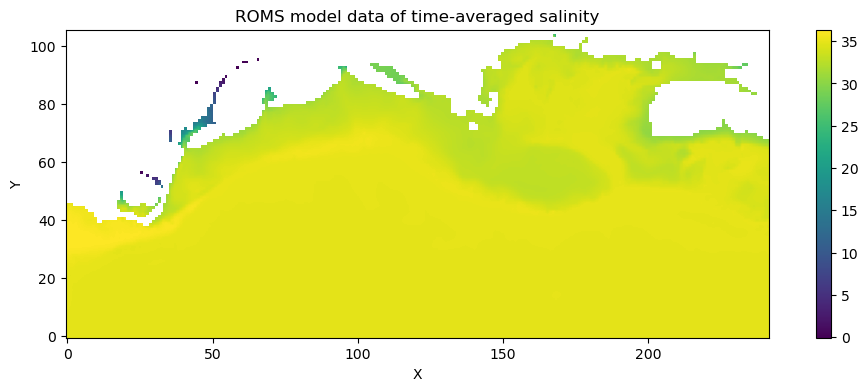

In [11]:
# plot data
plt.figure(figsize=(12,4))
im = plt.imshow(data_2D, origin='lower')
cbar = plt.colorbar(im)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('ROMS model data of {}'.format(var_name))

Complete the example by finalizing the component. finalize( ) method performs tasks that take place after using the data component, such as deallocating memory and closing files.

In [10]:
data_comp.finalize()